![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 4-MODUL. VIZUALIZASIYA

## Yakuniy amaliyot. `matplotlib`


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

XYZ kompaniyasi taxminan 4000 ishchi xodim ishlaydi va afsuski har yili xodimlarning 15% ga yaqini o'z xohishlari bilan yoki kompaniya tomonidan ishdan bo'shatiladi va yana yangi xodim ishga olinadi. Bu esa kompaniya uchun bir qancha noqulayliklar tug'diradi (loyihalar sekinlashishi, ishga qabul qilish jarayoni uzoqligi, yangi ishchi ko'nikishi uchun treninglar va ma'lum vaqt kerakligi). Ishchilarni saqlab qolish uchun kompaniya HR tahlil qilib ko'rishga qaror qildi va quyidagi datasetdan foydalanib, qanday faktorlar ishchilarni bo'shashiga sabab bo'lishini tahlil qilishgan.
Dataset ustun nomlari:

1.   Age - yoshi
2.   Attrition - ishdan bo'shaganmi
3.   BusinessTravel - komandirovka
4.   DistanceFromHome - uydan ishgacha bo'lgan masofa (km)
5.   Education - Ta'lim
6.   Gender - jinsi
7.   MaritalStatus - oilaviy holati


<a href="https://ibb.co/sR5zPJV"><img src="https://i.ibb.co/g9vh7FR/hr.png" alt="hr" border="0" style="width:100%"></a>


In [3]:
#@title QUYIDAGI KODGA TEGMANG!!!
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## 1-VAZIFA: Quyidagi CSV fayl linkidan foydalaning
### - va ma'lumotlarni "data" nomli o'zgaruvchiga biriktiring
### - hamda 'EmployeeCount','EmployeeID','StandardHours' ustunlari ortiqchaligi sababli o'chirib tashlang

### LINK: https://raw.githubusercontent.com/mukhammad-irmatov/health_dataset/main/hr_dataset.csv

In [4]:
# JAVOBNI SHUYERGA YOZING
!wget https://raw.githubusercontent.com/mukhammad-irmatov/health_dataset/main/hr_dataset.csv
data = pd.read_csv("/content/hr_dataset.csv")

--2023-10-26 15:03:43--  https://raw.githubusercontent.com/mukhammad-irmatov/health_dataset/main/hr_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 545583 (533K) [text/plain]
Saving to: ‘hr_dataset.csv’

hr_dataset.csv      100%[===================>] 532.80K  --.-KB/s    in 0.05s   

2023-10-26 15:03:43 (10.5 MB/s) - ‘hr_dataset.csv’ saved [545583/545583]



In [5]:

data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## 2-VAZIFA: Qaysi ustunlarda nechtadan null qiymatlar borligini aniqlang
### - o'sha ustunlardagi kataklarni 0 qiymati bilan to'ldiring.


In [7]:
from pandas.io.formats.style_render import Subset
# JAVOBNI SHUYERGA YOZING
data.fillna({'NumCompaniesWorked':0, "TotalWorkingYears":0},inplace=True)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


## 3-VAZIFA: Barcha ustunlardagi o'zaro korrelatsiyasini aniqlang
### - hamda heatmap orqali 16:10 o'lchamda ekranga chiqaring


<ipython-input-8-d7e03a6d18a4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(data.corr())


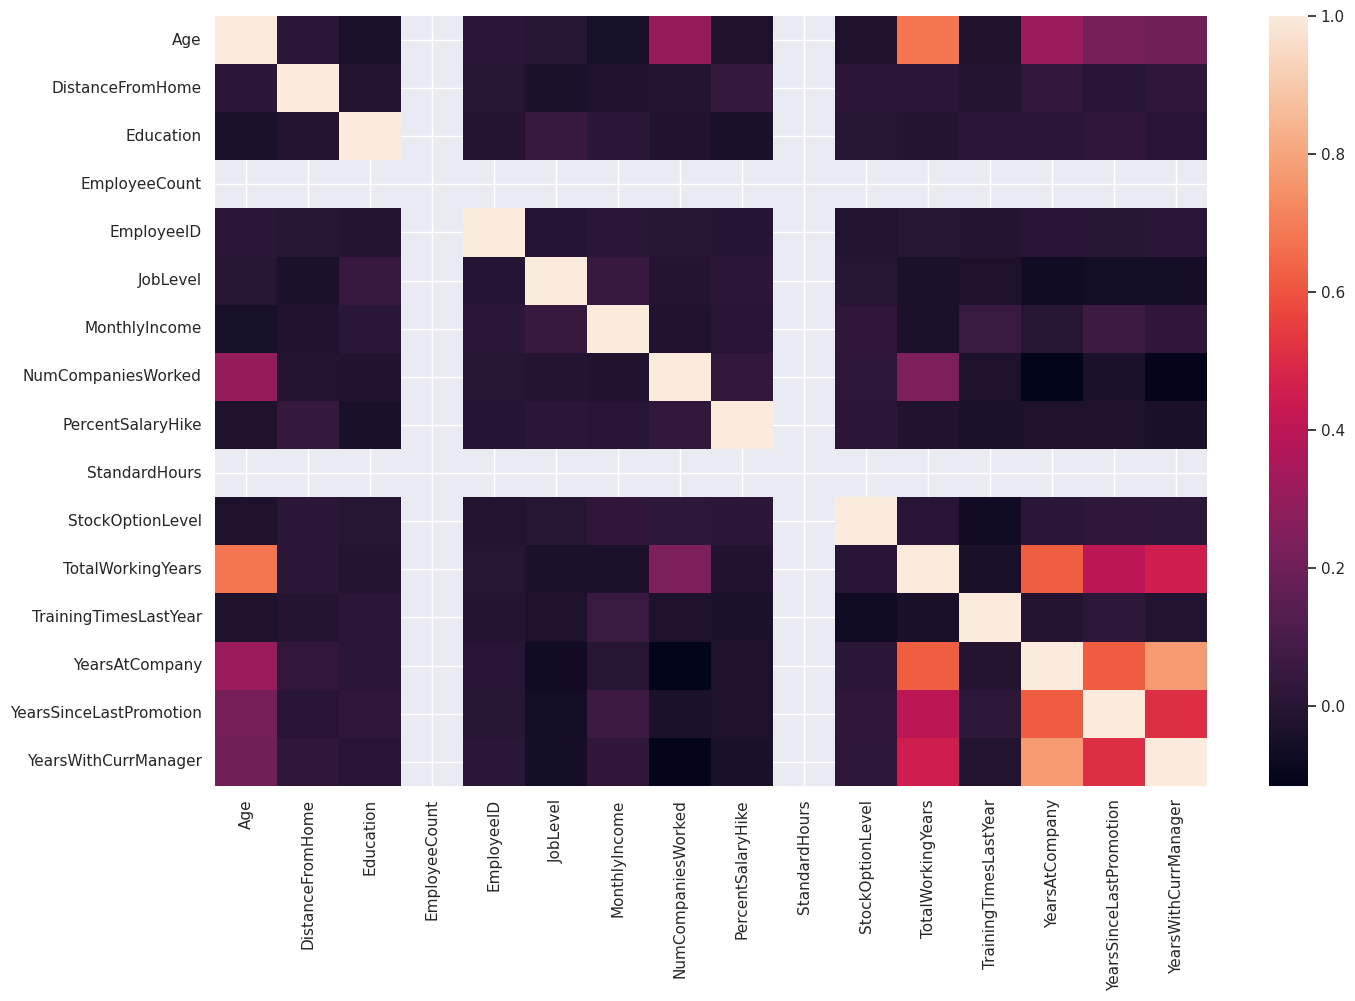

In [8]:
# JAVOBNI SHUYERGA YOZING
plt.figure(figsize=(16,10))
heatmap=sns.heatmap(data.corr())
#heatmap.set_title("Correlation of the DataFrame")
plt.show()

## 4-VAZIFA: Dataset uzunligini toping, ya'ni umumiy nechta qator(row) dan tashkil topgan
#### - Attrition(ishdan bo'shaganmi) ustunidagi "Yes" deb javob berilgan qatorlar soni
#### - Attrition(ishdan bo'shaganmi) ustunidagi "No" deb javob berilgan qatorlar soni
#### - Attrition(ishdan bo'shaganmi) ustunidagi "Yes" deb javob berilgan qatorlar soni umumiy datasetning necha fozini tashkil etadi
#### - Attrition(ishdan bo'shaganmi) ustunidagi "No" deb javob berilgan qatorlar soni umumiy datasetning necha fozini tashkil etadi

**Hint:** har birini ekranga chiqarish uchun print dan foydalaning


<a href="https://imgbb.com/"><img src="https://i.ibb.co/28VjRyB/img.png" alt="img" border="0"></a>

In [9]:
# JAVOBNI SHUYERGA YOZING
print(data.shape[0])
print(data[data.Attrition=='Yes'].shape[0])
print(data[data.Attrition=='No'].shape[0])
print(f"{(data[data.Attrition=='Yes'].shape[0])/4410*100} + % ni tashkil etadi")
print(f"{(data[data.Attrition=='No'].shape[0])/4410*100} + % ni tashkil etadi")

4410
711
3699
16.122448979591837 + % ni tashkil etadi
83.87755102040816 + % ni tashkil etadi


## 5-VAZIFA: Countplot() orqali Attrition ustunidagi ma'lumotlarni "Yes" "No" soniga ko'ra, ustunli grafik shaklida tasvirlang

<a href="https://imgbb.com/"><img src="https://i.ibb.co/Px9Bn6J/plt.png" alt="plt" border="0"></a>

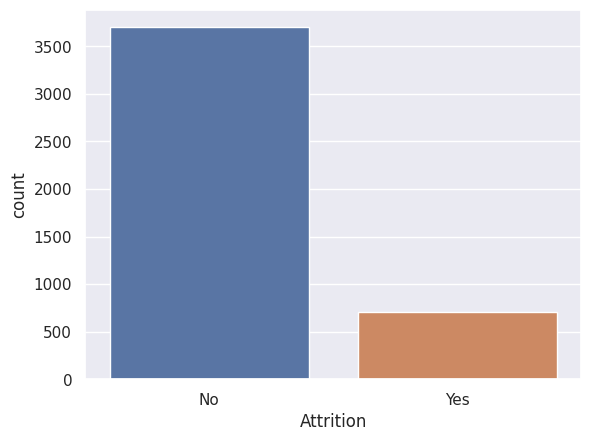

In [10]:
# JAVOBNI SHUYERGA YOZING
sns.countplot(data=data, x='Attrition')
plt.show()

## 6-VAZIFA: Countplot() orqali Attrition ustunidagi ma'lumotlarni "Yes" "No" soniga ko'ra hamda gender ustuniga bo'lingan holda ustunli grafikda tasvirlang.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/R7BC8z2/bygender.png" alt="bygender" border="0"></a>

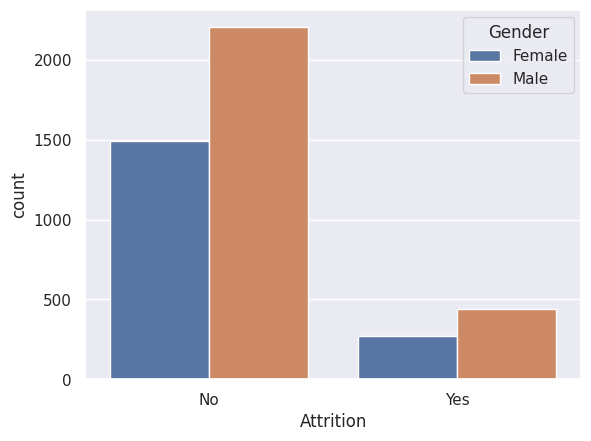

In [11]:
# JAVOBNI SHUYERGA YOZING
sns.countplot(data=data, x='Attrition', hue='Gender')
plt.show()

## 7-VAZIFA: Countplot() orqali Attrition ustunidagi ma'lumotlarni "Yes" "No" soniga ko'ra hamda jobLevel ustuniga bo'lingan holda ustunli grafikda tasvirlang.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/kmzVfDK/byjoblevel.png" alt="byjoblevel" border="0"></a><br /><a target='_blank' href='https://the-crosswordsolver.com/tobagos-island-neighbor-8-letters'></a><br />

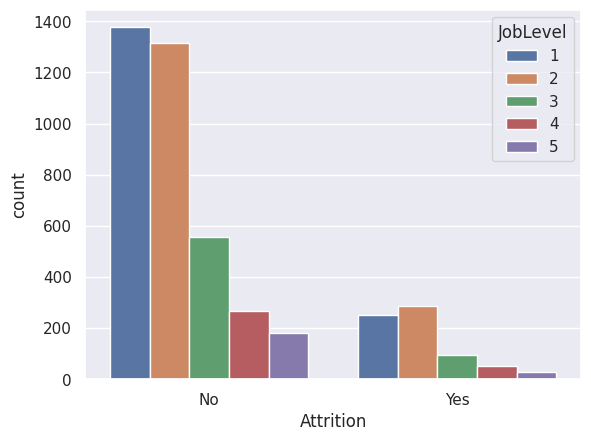

In [12]:
# JAVOBNI SHUYERGA YOZING
sns.countplot(data=data, x='Attrition', hue='JobLevel')
plt.show()

## 8-VAZIFA: Pie chart orqali "Attrition" (ishdan bo'shaganmi) ustunidagi Yes va No qiymatlariga ko'ra grafikni chiqaring

<a href="https://imgbb.com/"><img src="https://i.ibb.co/LZ4cCKb/PieChart.png" alt="PieChart" border="0"></a><br /><a target='_blank' href='https://the-crosswordsolver.com/netman-smith-4-letters'></a><br />

In [ ]:
# JAVOBNI SHUYERGA YO
part_yes = data[data.Attrition=='Yes'].shape[0]/4410*100
part_no = data[data.Attrition=='No'].shape[0]/4410*100

plt.pie([part_yes,part_no], labels=['Yes',"No"],frame=False)

plt.show()




## 9-VAZIFA:  Crosstab orqali "Attrition" (ishdan bo'shaganmi) ustunidagi Yes va No qiymatlari hamda Department ustuniga ko'ra grafikni chiqaring

<a href="https://imgbb.com/"><img src="https://i.ibb.co/g4KgG6q/depart.png" alt="depart" border="0"></a>

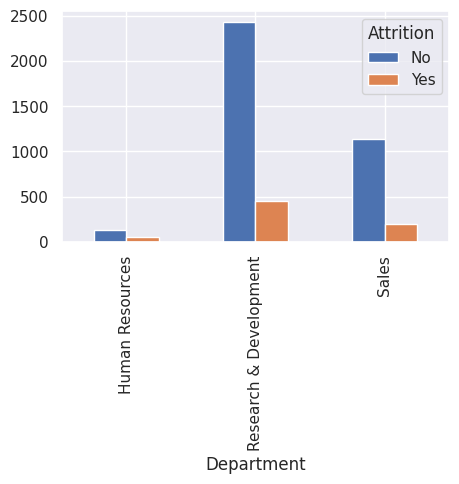

In [48]:
from pandas.core.reshape.pivot import crosstab
# JAVOBNI SHUYERGA YOZING
crosstb=crosstab(data.Department, data.Attrition)
crosstb.plot(kind='bar',figsize=(5,3))
plt.show()

In [50]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## 10-VAZIFA:  Seaborn kutubxonasining Distribution(taqsimot) imkoniyatidan foydalanib, Attrition(ishdan bo'shaganmi) ustunini MonthlyIncome ustuniga solishtirilganligini grafigini ekranga chiqaring.


**Hint: ** Bu orqali biz ishchining oylik maoshini uning ishdan bo'shab ketishiga bog'liq yoki bog'liq emasligini topamiz.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/zQc4FVZ/displot.png" alt="displot" border="0"></a><br /><a target='_blank' href='https://500pxdownload.com/'></a><br />

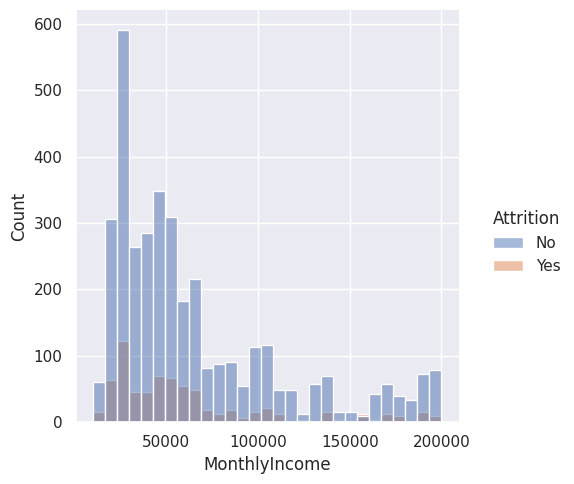

In [52]:
# JAVOBNI SHUYERGA YOZING
sns.displot(data=data, x='MonthlyIncome', hue='Attrition')
plt.show()